# Feature Engineering & Machine Learning Prédictif

### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importation du csv DVF

In [2]:
dvf = pd.read_csv('Data/dvf.csv', sep=',', low_memory=False)

## Partie 1 :Feature Engineering & Data Analysis round 2

### Remarques :
Après le premier nettoyage le dataset n'est pas encore prêt à être joué avec un algorithme.   
Il faut faut déterminer les colonnes qui vont être corrélées avec la target. C'est-à-dire qu'il nous faut connaître les colonnes qui vont influencer le prix d'un bien immobilier. Pour cela on va tout d'abord ce remémorer la composition du dataframe.

### Exploration des données

In [3]:
dvf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224142 entries, 0 to 2224141
Data columns (total 17 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id_mutation                object 
 1   date_mutation              object 
 2   nature_mutation            object 
 3   valeur_fonciere            float64
 4   adresse_nom_voie           object 
 5   nom_commune                object 
 6   code_departement           object 
 7   id_parcelle                object 
 8   nombre_lots                int64  
 9   code_type_local            float64
 10  type_local                 object 
 11  surface_reelle_bati        float64
 12  nombre_pieces_principales  float64
 13  surface_terrain            float64
 14  longitude                  float64
 15  latitude                   float64
 16  id_bien                    object 
dtypes: float64(7), int64(1), object(9)
memory usage: 288.5+ MB


In [4]:
dvf.describe()

,valeur_fonciere,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
count,2.224142e+06,2.224142e+06,1.348953e+06,1.223008e+06,1.346962e+06,1.875892e+06,2.171583e+06,2.171583e+06
mean,2.052168e+05,2.253525e-01,1.535372e+00,1.196465e+02,3.315520e+00,1.838143e+03,1.952514e+00,4.639342e+01
std,2.292359e+06,7.998093e-01,8.871148e-01,5.772342e+02,1.988447e+00,8.571996e+03,6.085189e+00,5.414858e+00
min,1.000000e-02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-6.315233e+01,-2.138595e+01
25%,4.166666e+04,0.000000e+00,1.000000e+00,6.400000e+01,2.000000e+00,2.410000e+02,-1.341860e-01,4.491790e+01
50%,1.200000e+05,0.000000e+00,1.000000e+00,8.800000e+01,4.000000e+00,5.170000e+02,2.266328e+00,4.714500e+01
75%,2.190000e+05,0.000000e+00,2.000000e+00,1.150000e+02,5.000000e+00,1.031000e+03,4.040598e+00,4.871642e+01
max,1.750000e+09,3.300000e+02,4.000000e+00,2.778140e+05,1.120000e+02,3.058525e+06,5.582859e+01,5.108207e+01


### Remarques :
Le describe permet de voir les écarts au sein des des colonnes numériques.  
On remarque ainsi une grande disparité des prix dans la colonne foncière, de 0.01€ à 1 750 000 000€.
Il conviendra surement de faire des fourchettes de prix ou de réduire les données.

In [5]:
dvf.isnull().sum()

id_mutation                        0
date_mutation                      0
nature_mutation                    0
valeur_fonciere                    0
adresse_nom_voie                3087
nom_commune                        0
code_departement                   0
id_parcelle                        0
nombre_lots                        0
code_type_local               875189
type_local                    875189
surface_reelle_bati          1001134
nombre_pieces_principales     877180
surface_terrain               348250
longitude                      52559
latitude                       52559
id_bien                            0
dtype: int64

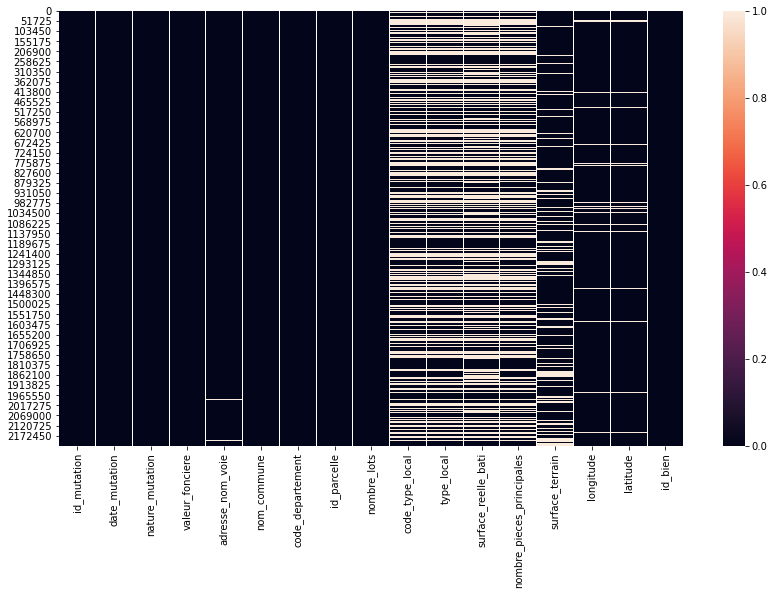

In [6]:
plt.figure(figsize=(14,8))
sns.heatmap(dvf.isnull())

### Remarques :
Cette requête nous informe sur le nombre de Null dans les colonnes, c'est-à-dire le nombre de lignes où les données ne sont pas renseignées.  
On remarque alors qu'il en reste beaucoup, un traitement s'avère nécessaire pour éviter le bruit dans les données se qui conduira à des résultats faussés.

### En conlusion : 
Il faut:
  * traiter les NaN : afin d'en faire une catégorie à part ===> comment / cb de cat 
  * voir pour ne garder que les colonnes qui sont corrélées à la target : `valeur_fonciere`
  * supprimer les données `nature_mutation` qui ne sont pas égales à des Ventes pour coller au besoin du client
  * créer une fourchette de prix

#### Récupération des données de vente seulement 

In [7]:
dvf['nature_mutation'].unique()

array(['Vente', 'Echange', 'Vente terrain à bâtir',
       "Vente en l'état futur d'achèvement", 'Adjudication',
       'Expropriation'], dtype=object)

In [8]:
dvf2 = dvf.loc[dvf['nature_mutation'].isin(['Vente','Vente terrain à bâtir',"Vente en l'état futur d'achèvement"])]

In [9]:
dvf2['nature_mutation'].unique()

array(['Vente', 'Vente terrain à bâtir',
       "Vente en l'état futur d'achèvement"], dtype=object)

### Remarque:
Le nouveau dataframe n'a maintenant que les ventes de biens ce qui permet de coller au mieux à la demande du client qui est de "faire une estimation des biens de vente". 

#### Traitement des NaN de la colonne `type_local`

In [10]:
dvf2['type_local'] = dvf2['type_local'].fillna('None')

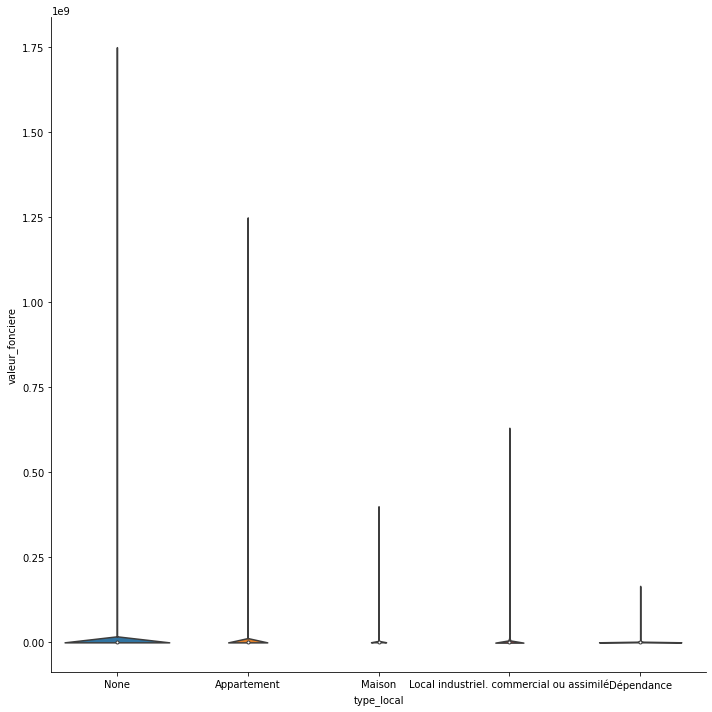

In [11]:
sns.catplot(x="type_local",y="valeur_fonciere",data=dvf2, kind='violin', height=10)

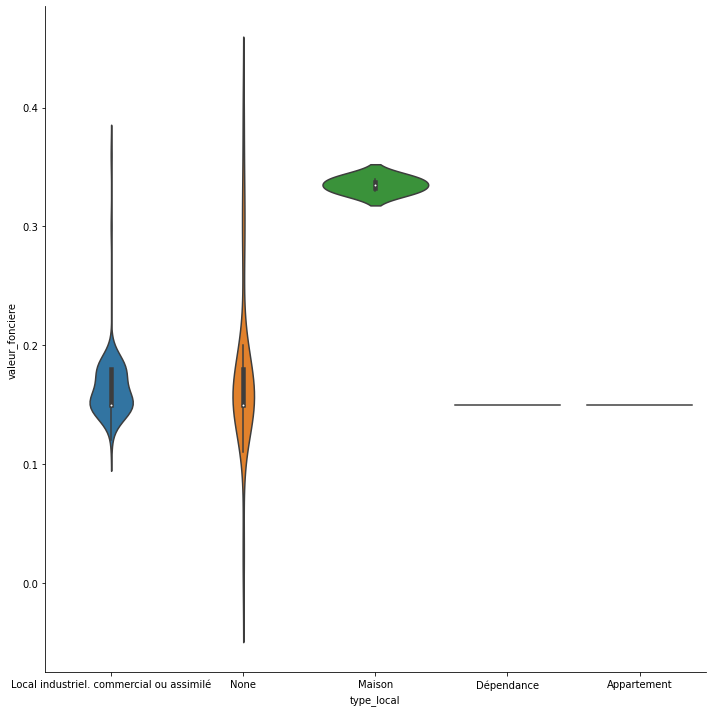

In [12]:
sns.catplot(x="type_local",y="valeur_fonciere",data=dvf2[dvf2['valeur_fonciere']<0.5], kind='violin', height=10)

### Remarques

Dans la colonne `type_local` 'None' se rapprochent plus de 'Local industriel. commercial ou assimilé' on peut donc supposer que les 'None' en sont.

On peut également se poser la question des valeurs extrêmes de `valeur_fonciere`

In [13]:
dvf2['type_local'] = dvf2['type_local'].replace('None', 'Local industriel. commercial ou assimilé')

In [14]:
dvf2['type_local'].unique()

array(['Local industriel. commercial ou assimilé', 'Appartement',
       'Maison', 'Dépendance'], dtype=object)

In [15]:
dvf2['code_type_local'] = dvf2['code_type_local'].fillna(4)

In [16]:
dvf2['code_type_local'].unique()

array([4., 2., 1., 3.])

In [17]:
dvf2['nombre_pieces_principales'] = dvf2['nombre_pieces_principales'].fillna(0)

#### Gestion des Outliers de `valeur_fonciere`

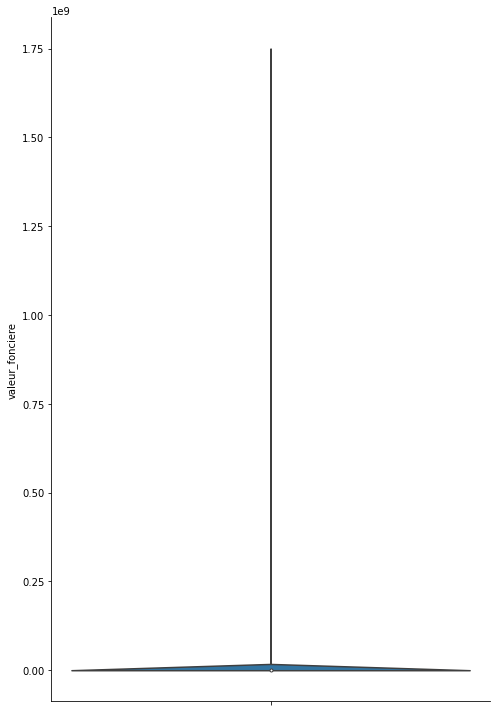

In [18]:
sns.catplot( y="valeur_fonciere",
                data=dvf2, kind="violin",
                height=10, aspect=.7)

In [19]:
dvf2.valeur_fonciere.describe()

count    2.192874e+06
mean     2.072833e+05
std      2.307654e+06
min      1.000000e-02
25%      4.500000e+04
50%      1.216505e+05
75%      2.200000e+05
max      1.750000e+09
Name: valeur_fonciere, dtype: float64

### Remarques :
Que ça soit par le graphique ou par la méthode ".describe()" il ya une mise ne évidence claire d'une grande variation dans le prix de vente.  
On peut donc choisir de ne prendre les valeurs qu'entre 45 000€ et 220 000€ ce qui correspond aux valeurs comprises entre le 1er et le 3ème quartile.  
Les autres seront considérées comme des outliers.

In [20]:
dvf2 = dvf2.loc[dvf2['valeur_fonciere'].between(45000, 220000)]
dvf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103600 entries, 0 to 2224129
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   id_mutation                1103600 non-null  object 
 1   date_mutation              1103600 non-null  object 
 2   nature_mutation            1103600 non-null  object 
 3   valeur_fonciere            1103600 non-null  float64
 4   adresse_nom_voie           1102392 non-null  object 
 5   nom_commune                1103600 non-null  object 
 6   code_departement           1103600 non-null  object 
 7   id_parcelle                1103600 non-null  object 
 8   nombre_lots                1103600 non-null  int64  
 9   code_type_local            1103600 non-null  float64
 10  type_local                 1103600 non-null  object 
 11  surface_reelle_bati        730190 non-null   float64
 12  nombre_pieces_principales  1103600 non-null  float64
 13  surface_terr

### Etude de la corrélation
* si le coefficient est proche de 1 c’est qu’il y a une forte corrélation positive
* si le coefficient est proche de -1 c’est qu’il y a une forte corrélation négative
* si le coefficient est proche de 0 en valeur absolue c’est qu’il y a une faible corrélation.

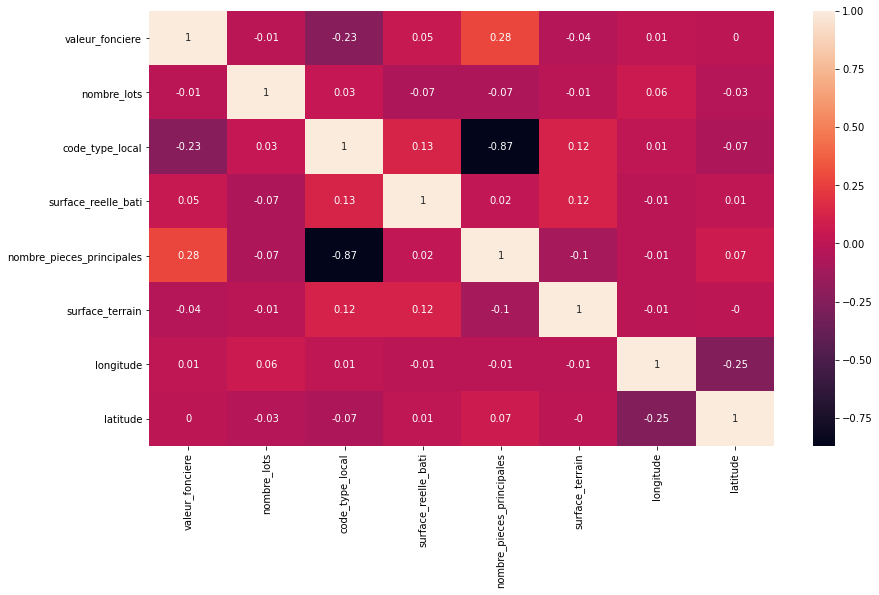

In [21]:
dvf_corr = dvf2.corr().round(2)
plt.figure(figsize=(14,8))
sns.heatmap(data=dvf_corr, annot=True)

### Remarques : 

* Correlation : La matrice montre une forte corrélation négative entre `nombre_pieces_principales` et `code_type_local`
* Feature selection :
    * `valeur_fonciere` qui est la target
    * `code_departement` les départements seront regroupés en régions
    * `type_local`
    * `nombre_pieces_principales`


### Mise en place d'un DF final pour les algorithmes


### Création de la colonne `regions`

In [22]:
listeNordEst=['02','08','10', '51', '52', '54', '55', '57','59', '60', '62', '67', '68', '70', '80', '88', '90']
listeNordOuest=['14', '22', '27', '28', '29', '35', '36', '37', '41', '44', '45', '49', '50', '53', '56', '61', '72', '76', '79', '85', '86']
listeSudEst=['01', '03', '04', '05', '06', '13', '18', '21', '25', '26', '38', '39', '42', '58', '69', '71', '73', '74', '83', '84', '89']
listeSudOuest=['2A', '2B', '07', '09', '11', '12', '15', '16', '17', '19', '23', '24', '30', '31', '32', '33', '34', '40', '43', '46', '47', '48', '63', '64', '65', '66', '81', '82', '87']
listeRegionParis=['75', '77', '78', '91', '92', '93', '94', '95']
listeDOMTOM=['971', '972', '973', '974']

In [23]:
dvf2['regions']=np.where(dvf2['code_departement'].isin(listeNordEst), 'NordEst', dvf2['code_departement'])

In [24]:
dvf2['regions']=np.where(dvf2['regions'].isin(listeNordOuest), 'NordOuest', dvf2['regions'])

In [25]:
dvf2['regions']=np.where(dvf2['regions'].isin(listeSudEst), 'SudEst', dvf2['regions'])

In [26]:
dvf2['regions']=np.where(dvf2['regions'].isin(listeSudOuest), 'SudOuest', dvf2['regions'])

In [27]:
dvf2['regions']=np.where(dvf2['regions'].isin(listeRegionParis), 'RegionParis', dvf2['regions'])

In [28]:
dvf2['regions']=np.where(dvf2['regions'].isin(listeDOMTOM), 'DOMTOM', dvf2['regions'])

In [29]:
dvf2.regions.unique()

array(['SudEst', 'NordEst', 'SudOuest', 'NordOuest', 'RegionParis',
       'DOMTOM'], dtype=object)

In [30]:
### mise en place de dummies
to_dummies = pd.get_dummies(dvf2['type_local'])
to_dummies.head()

,Appartement,Dépendance,Local industriel. commercial ou assimilé,Maison
0,0,0,1,0
4,0,0,0,1
5,0,0,0,1
6,0,0,1,0
7,0,0,1,0


In [31]:
to_dummies2 = pd.get_dummies(dvf2['regions'])
to_dummies2.head()

,DOMTOM,NordEst,NordOuest,RegionParis,SudEst,SudOuest
0,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,1,0
7,0,0,0,0,1,0


In [32]:
dvf2 = pd.concat([dvf2, to_dummies], axis=1)

In [33]:
dvf2 = pd.concat([dvf2, to_dummies2], axis=1)

In [34]:
dvf2['nombre_pieces_principales']=dvf2['nombre_pieces_principales'].astype("int64")

In [35]:
dvf2.dtypes

id_mutation                                  object
date_mutation                                object
nature_mutation                              object
valeur_fonciere                             float64
adresse_nom_voie                             object
nom_commune                                  object
code_departement                             object
id_parcelle                                  object
nombre_lots                                   int64
code_type_local                             float64
type_local                                   object
surface_reelle_bati                         float64
nombre_pieces_principales                     int64
surface_terrain                             float64
longitude                                   float64
latitude                                    float64
id_bien                                      object
regions                                      object
Appartement                                   uint8
Dépendance  

In [36]:
dvf_prep=dvf2[['valeur_fonciere','SudEst', 'SudOuest', 'NordEst', 'NordOuest', 'RegionParis', 'DOMTOM', 'nombre_pieces_principales', 'Appartement', 'Dépendance',
                   'Local industriel. commercial ou assimilé', 'Maison']].reset_index(drop=True)
dvf_prep

,valeur_fonciere,SudEst,SudOuest,NordEst,NordOuest,RegionParis,DOMTOM,nombre_pieces_principales,Appartement,Dépendance,Local industriel. commercial ou assimilé,Maison
0,115000.0,1,0,0,0,0,0,0,0,0,1,0
1,175050.0,1,0,0,0,0,0,5,0,0,0,1
2,165900.0,1,0,0,0,0,0,4,0,0,0,1
3,181800.0,1,0,0,0,0,0,0,0,0,1,0
4,177000.0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1103595,210000.0,0,0,0,0,1,0,1,1,0,0,0
1103596,63000.0,0,0,0,0,1,0,0,0,1,0,0
1103597,146400.0,0,0,0,0,1,0,3,1,0,0,0
1103598,198000.0,0,0,0,0,1,0,1,1,0,0,0


In [37]:
dvf_prep.to_csv('dvf_prep.csv', index=False) 

## Partie 2 : Machine Learning Prédictif

### Import librairies 

In [38]:
from sklearn import linear_model, tree, preprocessing
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

###  Scaling Data

La mise à l'échelle des données peut être utile et / ou nécessaire dans certaines circonstances (par exemple, lorsque les variables s'étendent sur différentes plages). Il existe plusieurs versions différentes de la mise à l'échelle. Les procédures de mise à l'échelle peuvent être appliquées à la matrice de données complète ou à des parties de la matrice uniquement (par exemple, par colonne).  
Ici on va faire du MinMaxScaler et du StandardScaler pour la colonne `nombre_pieces_principales`

#### Récupération de la colonne `nombre_pieces_principales`

In [39]:
PieceArray=dvf_prep['nombre_pieces_principales'].values

#### Mise en place des méthodes de scaling MinMaxScaler() et  StandardScaler() sur la colonne `nombre_pieces_principales` et création de Dataframes 

In [40]:
MinMaxScaler=preprocessing.MinMaxScaler()
ScalerStandard= preprocessing.StandardScaler()

PieceMinMax=MinMaxScaler.fit_transform(PieceArray.reshape(-1, 1))
PieceMinMaxDF=pd.DataFrame(data=PieceMinMax, columns=['PieceMinMax'])

PieceStandard=ScalerStandard.fit_transform(PieceArray.reshape(-1, 1))
PieceStandardDF=pd.DataFrame(data=PieceStandard, columns=['PieceStandard'])

#### Concaténation des Dataframes scalés avec le Dataframe de base dvf_prep pour la création d'un nouveau Dataframe pour les tests d'algorithmes

In [41]:
dvf_scaled = pd.concat([dvf_prep, PieceMinMaxDF,PieceStandardDF], axis=1)
dvf_scaled

,valeur_fonciere,SudEst,SudOuest,NordEst,NordOuest,RegionParis,DOMTOM,nombre_pieces_principales,Appartement,Dépendance,Local industriel. commercial ou assimilé,Maison,PieceMinMax,PieceStandard
0,115000.0,1,0,0,0,0,0,0,0,0,1,0,0.000000,-1.100674
1,175050.0,1,0,0,0,0,0,5,0,0,0,1,0.074627,1.262847
2,165900.0,1,0,0,0,0,0,4,0,0,0,1,0.059701,0.790143
3,181800.0,1,0,0,0,0,0,0,0,0,1,0,0.000000,-1.100674
4,177000.0,1,0,0,0,0,0,0,0,0,1,0,0.000000,-1.100674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103595,210000.0,0,0,0,0,1,0,1,1,0,0,0,0.014925,-0.627970
1103596,63000.0,0,0,0,0,1,0,0,0,1,0,0,0.000000,-1.100674
1103597,146400.0,0,0,0,0,1,0,3,1,0,0,0,0.044776,0.317439
1103598,198000.0,0,0,0,0,1,0,1,1,0,0,0,0.014925,-0.627970


## Tests Algorithmes avec le MinMaxScaler()

In [42]:
X = dvf_scaled[['SudEst', 'SudOuest', 'NordEst', 'NordOuest', 'RegionParis', 'DOMTOM', 
              'PieceMinMax', 'Appartement', 'Dépendance',
              'Local industriel. commercial ou assimilé', 'Maison']].values
Y = dvf_scaled[['valeur_fonciere']].values.reshape(-1, 1)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(772520, 11) (772520, 1) (331080, 11) (331080, 1)


### Régression Linéaire

La régression linéaire est une approche statistique pour modéliser la relation entre une variable dépendante avec un ensemble donné de variables indépendantes.  

In [44]:
reg = LinearRegression()
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
reg1 = reg.fit(X_train, Y_train)
print(reg1.coef_)
print(reg1.intercept_)

[[-1.47291254e+13 -1.47291254e+13 -1.47291254e+13 -1.47291254e+13
  -1.47291254e+13 -1.47291254e+13  6.28752496e+05 -4.07462518e+14
  -4.07462518e+14 -4.07462518e+14 -4.07462518e+14]]
[4.22191643e+14]


In [46]:
Y_pred_reg = reg1.predict(X_test)
Y_pred_reg.shape

(331080, 1)

In [47]:
mean_squared_error(Y_test, Y_pred_reg)

2160411422.4450855

In [48]:
r2_score(Y_test, Y_pred_reg)

0.11172316345943545

In [49]:
scores_reg = cross_val_score(reg1, X, Y, cv=5)
scores_reg

array([0.11203022, 0.10723495, 0.11156093, 0.10517912, 0.11414974])

### Arbre de décisions

Arbre de décision est un outil de prise de décision qui utilise une structure arborescente de type organigramme ou est un modèle de décisions et de tous leurs résultats possibles, y compris les résultats, les coûts d'entrée et l'utilité.

L'algorithme d'arbre de décision appartient à la catégorie des algorithmes d'apprentissage supervisé. Il fonctionne à la fois pour les variables de sortie continues et catégorielles.  

In [50]:
dtr = DecisionTreeRegressor()
dtr

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [51]:
dtr1= dtr.fit(X_train, Y_train)

In [52]:
Y_pred_dtr = dtr1.predict(X_test)
Y_pred_dtr.shape

(331080,)

In [53]:
mean_squared_error(Y_test, Y_pred_dtr)

2129462337.1777048

In [54]:
r2_score(Y_test, Y_pred_dtr)

0.124448219099078

In [55]:
scores_dtr = cross_val_score(dtr1, X, Y, cv=5)
scores_dtr

array([0.1205654 , 0.11809745, 0.12268213, 0.11653689, 0.1278258 ])

### Régresseur Ridge

Un régresseur Ridge est essentiellement une version régularisée du régresseur linéaire. c.-à-d. à la fonction de coût d'origine du régresseur linéaire, nous ajoutons un terme régularisé qui oblige l'algorithme d'apprentissage à s'adapter aux données et aide à maintenir les poids aussi bas que possible. Le terme régularisé a le paramètre «alpha» qui contrôle la régularisation du modèle, c'est-à-dire qui aide à réduire la variance des estimations.  

In [56]:
ridge = Ridge(alpha=1.0)
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [57]:
ridge1=ridge.fit(X_train, Y_train)

In [58]:
Y_pred_ridge = ridge1.predict(X_test)
Y_pred_ridge.shape

(331080, 1)

In [59]:
mean_squared_error(Y_test, Y_pred_ridge)

2160383647.441104

In [60]:
r2_score(Y_test, Y_pred_ridge)

0.11173458345676346

In [61]:
scores_ridge = cross_val_score(ridge1, X, Y, cv=5)
scores_ridge

array([0.11206314, 0.107248  , 0.11156334, 0.10514636, 0.11413931])

### Radom Forest Regressor

Une forêt aléatoire est une technique d'ensemble capable d'effectuer à la fois des tâches de régression et de classification à l'aide de plusieurs arbres de décision et une technique appelée Bootstrap Aggregation, communément appelée ensachage. L'idée de base derrière cela est de combiner plusieurs arbres de décision pour déterminer la sortie finale plutôt que de s'appuyer sur des arbres de décision individuels.  

In [62]:
rfr = RandomForestRegressor()
rfr

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [63]:
rfr1=rfr.fit(X_train, Y_train)

In [64]:
Y_pred_rfr = rfr1.predict(X_test)
Y_pred_rfr.shape

(331080,)

In [65]:
mean_squared_error(Y_test, Y_pred_rfr)

2129293304.323842

In [66]:
r2_score(Y_test, Y_pred_rfr)

0.12451771880970752

In [67]:
scores_rfr = cross_val_score(rfr1, X, Y, cv=5)
scores_rfr

array([0.12068162, 0.11815099, 0.12264953, 0.11658163, 0.12789044])

### XGBoost (eXtreme Gradient Boosting)

XGBoost est une implémentation d'arbres de décision à gradient amélioré. Il s'agit d'un type de bibliothèque de logiciels qui a été conçu essentiellement pour améliorer la vitesse et les performances du modèle. 

Dans cet algorithme, les arbres de décision sont créés sous forme séquentielle. Les poids jouent un rôle important dans XGBoost. Des poids sont attribués à toutes les variables indépendantes qui sont ensuite introduites dans l'arbre de décision qui prédit les résultats. Le poids des variables prédites incorrectement par l'arbre est augmenté et ces variables sont ensuite introduites dans le deuxième arbre de décision. Ces classificateurs / prédicteurs individuels s'assemblent ensuite pour donner un modèle solide et plus précis. Il peut fonctionner sur les problèmes de régression, de classification, de classement et de prédiction définis par l'utilisateur.

In [68]:
boost= xgb.XGBRegressor()
boost

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=False, verbosity=None)

In [69]:
boost1=boost.fit(X_train, Y_train)

In [70]:
Y_pred_boost = boost1.predict(X_test)
Y_pred_boost.shape

(331080,)

In [71]:
mean_squared_error(Y_test, Y_pred_boost)

2129393391.0623667

In [72]:
r2_score(Y_test, Y_pred_boost)

0.12447656705011545

In [73]:
scores_boost = cross_val_score(boost1, X, Y, cv=5)
scores_boost

array([0.12065245, 0.11808176, 0.12263786, 0.11653104, 0.12787491])

## Tests Algorithmes avec le StandardScaler()

In [74]:
X2 = dvf_scaled[['SudEst', 'SudOuest', 'NordEst', 'NordOuest', 'RegionParis', 'DOMTOM', 
              'PieceStandard', 'Appartement', 'Dépendance',
              'Local industriel. commercial ou assimilé', 'Maison']].values
Y2 = dvf_scaled[['valeur_fonciere']].values.reshape(-1, 1)

In [75]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.3, random_state=42)
print(X_train2.shape, Y_train2.shape, X_test2.shape, Y_test2.shape)

(772520, 11) (772520, 1) (331080, 11) (331080, 1)


### Régression Linéaire

In [76]:
reg2 = reg.fit(X_train2, Y_train2)
print(reg2.coef_)
print(reg2.intercept_)

[[-1.47578849e+13 -1.47578849e+13 -1.47578849e+13 -1.47578849e+13
  -1.47578849e+13 -1.47578849e+13  1.97663428e+04 -4.09891544e+14
  -4.09891544e+14 -4.09891544e+14 -4.09891544e+14]]
[4.24649429e+14]


In [77]:
Y_pred_reg2 = reg2.predict(X_test2)
Y_pred_reg2.shape

(331080, 1)

In [78]:
mean_squared_error(Y_test2, Y_pred_reg2)

2160400728.556052

In [79]:
r2_score(Y_test2, Y_pred_reg2)

0.1117275603691269

In [80]:
scores_reg2 = cross_val_score(reg2, X2, Y2, cv=5)
scores_reg2

array([0.11203044, 0.10722734, 0.11153583, 0.1051723 , 0.11417601])

### Arbre de décisions

In [81]:
dtr2 = dtr.fit(X_train2, Y_train2)

In [82]:
Y_pred_dtr2 = dtr2.predict(X_test2)
Y_pred_dtr2.shape

(331080,)

In [83]:
mean_squared_error(Y_test2, Y_pred_dtr2)

2129462337.1777048

In [84]:
r2_score(Y_test2, Y_pred_dtr2)

0.124448219099078

In [85]:
scores_dtr2 = cross_val_score(dtr2, X2, Y2, cv=5)
scores_dtr2

array([0.12058175, 0.11811095, 0.122682  , 0.11653689, 0.12782462])

### Régresseur Ridge

In [86]:
ridge2 = ridge.fit(X_train2, Y_train2)

In [87]:
Y_pred_ridge2 = ridge2.predict(X_test2)
Y_pred_ridge2.shape

(331080, 1)

In [88]:
mean_squared_error(Y_test2, Y_pred_ridge2)

2160397327.721159

In [89]:
r2_score(Y_test2, Y_pred_ridge2)

0.1117289586596697

In [90]:
scores_ridge2 = cross_val_score(ridge2, X2, Y2, cv=5)
scores_ridge2

array([0.11208317, 0.10724381, 0.11156336, 0.10515454, 0.11410703])

### Radom Forest Regressor

In [91]:
rfr2 = rfr.fit(X_train2, Y_train2)

In [92]:
Y_pred_rfr2 = rfr2.predict(X_test2)
Y_pred_rfr2.shape

(331080,)

In [93]:
mean_squared_error(Y_test2, Y_pred_rfr2)

2129298270.951985

In [94]:
r2_score(Y_test2, Y_pred_rfr2)

0.12451567672610764

In [95]:
scores_rfr2 = cross_val_score(rfr2, X2, Y2, cv=5)
scores_rfr2

array([0.12062543, 0.11818833, 0.12266348, 0.11659991, 0.12795248])

### XGBoost (eXtreme Gradient Boosting)

In [96]:
boost2= boost.fit(X_train2, Y_train2)

In [97]:
Y_pred_boost2 = boost2.predict(X_test2)
Y_pred_boost2.shape

(331080,)

In [98]:
mean_squared_error(Y_test2, Y_pred_boost2)

2129393391.0623667

In [99]:
r2_score(Y_test2, Y_pred_boost2)

0.12447656705011545

In [100]:
scores_boost2 = cross_val_score(boost2, X2, Y2, cv=5)
scores_boost2

array([0.12065228, 0.11808176, 0.1226397 , 0.11653104, 0.12787491])

### Remarques
* Les résultats ne sont pas bons:  
    * Les Mean Squared errors sont plus haut que le prix max des biens 
    * Les r2 score sont trop bas  
Il faudrait pour modifier ça reprendre avec le client toutes les données pour avoir un échantillon de base valable.  

* On peut jouer sur les paramètres des algorithmes pour esssayer d'améliorer les résultats 
    * Je choisis donc l'algorithme qui a un Mean Square Error le plus faible. Ici c'est le Random Forest Regressor avec comme préprocessing le Standard Scaler.
    * Je vais donc utiliser la méthode du Grid Search afin de connaître la meilleure combinaison possible de paramètres pour cet algorithme dans notre cas.

### GridSearch

In [101]:
# from sklearn.model_selection import GridSearchCV

In [102]:
# param_grid = {'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, None],
# 'max_features': ['auto', 'sqrt'],
# 'min_samples_leaf': [1, 2, 3],
# 'min_samples_split': [2, 5, 10],
# 'n_estimators': [100, 200, 400]}

In [103]:
# rfr=RandomForestRegressor()
# rfr

In [104]:
# grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
#                          cv = 3, n_jobs = -1, verbose = 2)

In [105]:
# grid_search.fit(X_train2, Y_train2)

In [106]:
# grid_search.best_params_

In [107]:
# best_grid = grid_search.best_estimator_
# grid_accuracy = evaluate(best_grid, X_test2, Y_test2)